In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
import plotly.graph_objects as go
from PIL import Image

Open data

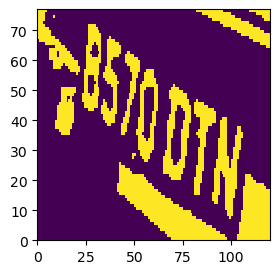

In [42]:
img = cv2.imread('obs3.png', cv2.IMREAD_GRAYSCALE)
np.array(img)
img = np.flipud(img)

mask = img < 145

plt.figure(figsize=(3, 3))
plt.pcolormesh(mask)

Next we can use the `clear_border` function to remove the outer border:

In [43]:
# Label the connected components
mask_labeled, num_labels = ndi.label(mask)

# Get the bounding boxes of each component
slices = ndi.find_objects(mask_labeled)

# Create a new mask without the components touching the border
new_mask = np.zeros_like(mask_labeled)
for i, slc in enumerate(slices, start=1):
    is_border = False
    for s, dim in zip(slc, mask_labeled.shape):
        if s.start == 0 or s.stop == dim:
            is_border = True
            break
    if not is_border:
        new_mask[slc] = mask_labeled[slc] * (mask_labeled[slc] == i)

# Replace the original mask with the new mask
# mask = new_mask > 0

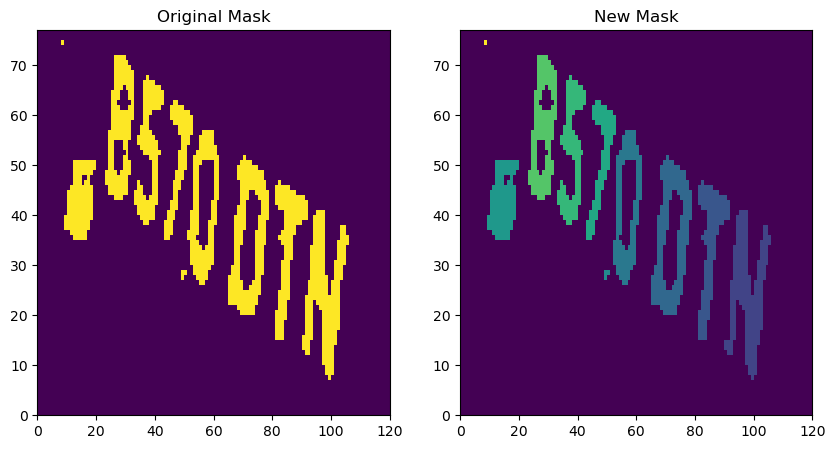

In [44]:
mask = np.vectorize(clear_border, signature='(n,m)->(n,m)')(mask)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display original mask
axs[0].pcolormesh(mask)
axs[0].set_title('Original Mask')

# Display new mask
axs[1].pcolormesh(new_mask)
axs[1].set_title('New Mask')

plt.show()

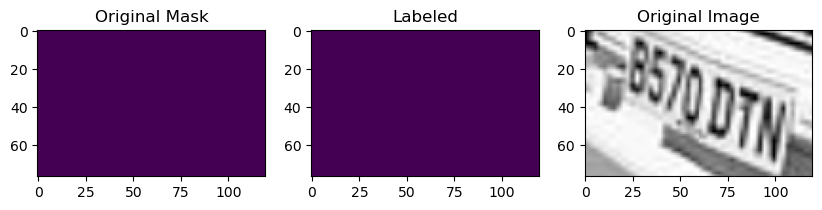

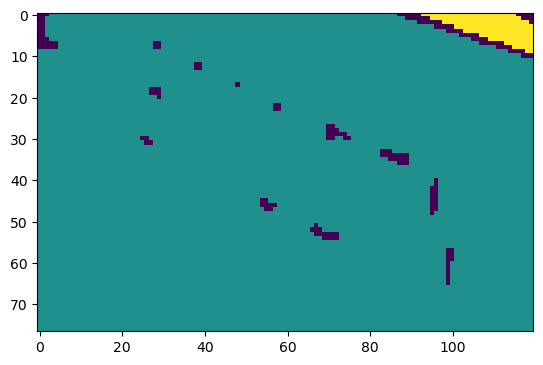

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, morphology
import scipy.ndimage as ndimage
import cv2

# Load your image
# image = cv2.imread('frame_350.jpg', cv2.IMREAD_GRAYSCALE) # frame_350.jpg
# image = cv2.imread('new_frame_170.jpg', cv2.IMREAD_GRAYSCALE) # frame_350.jpg

# Preprocess the image
# Apply any necessary filtering, denoising, or smoothing operations
# For example, using a Gaussian filter:
image = cv2.imread('obs3.png', cv2.IMREAD_GRAYSCALE)
image_filtered = ndimage.gaussian_filter(image, sigma=1)

# Apply thresholding to create a binary mask
mask = image_filtered > 60  # Replace threshold_value with an appropriate value


# Remove small components from the mask
mask = morphology.remove_small_objects(mask, min_size=50, connectivity=0)

# Label the connected components
mask_labeled = morphology.label(mask, connectivity=1)

# Get the bounding boxes of each component
slices = ndi.find_objects(mask_labeled)

# Create a new mask without the components touching the border
new_mask = np.zeros_like(mask_labeled)
for i, slc in enumerate(slices, start=1):
    is_border = False
    for s, dim in zip(slc, mask_labeled.shape):
        if s.start == 0 or s.stop == dim:
            is_border = True
            break
    if not is_border:
        new_mask[slc] = mask_labeled[slc] * (mask_labeled[slc] == i)

# Replace the original mask with the new mask
mask = new_mask > 0

# Display the masks
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(mask)
axs[0].set_title('Original Mask')
axs[1].imshow(new_mask)
axs[1].set_title('Labeled')
axs[2].imshow(image, cmap='gray')
axs[2].set_title('Original Image')
plt.show()

slc = mask_labeled
rps = regionprops(slc)
areas = [r.area for r in rps]
np.argsort(areas)[::-1]

slc = mask_labeled
rps = regionprops(slc)
areas = [r.area for r in rps]
idxs = np.argsort(areas)[::-1] # we want largest to smallest

new_slc = np.zeros_like(slc)

new_slc = np.zeros_like(slc)
for i in idxs[:5]:
    new_slc[tuple(rps[i].coords.T)] = i+1

plt.imshow(new_slc)